# Multi Linear Regression - House Price Prediction

# Directories, Libraries and Data 

In [1]:
%cd C:/Users/shrav/Data_Analysis_Projects/Project_Files

C:\Users\shrav\Data_Analysis_Projects\Project_Files


In [2]:
# Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from custom_functions import *

- **date**: Date of the home sale
- **price**: Price of each home sold
- **bedrooms**: Number of bedrooms
- **bathrooms**: Number of bathrooms
- **living_in_m2**: Square meters of the apartments interior living space
- **nice_view**: A flag that indicates the view's quality of a property
- **perfect_condition**: A flag that indicates the maximum index of the apartment condition
- **grade**: An index from 1 to 5, where 1 falls short of quality level and 5 have a high quality level of construction and design
- **has_basement**: A flag indicating whether or not a property has a basement
- **renovated**: A flag if the property was renovated
- **has_lavatory**: Check for the presence of these incomplete/secondary bathrooms (bathtub, sink, toilet)
- **single_floor**: A flag indicating whether the property had only one floor
- **month**: The month of the home sale
- **quartile_zone**: A quartile distribution index of the most expensive zip codes, where 1 means less expansive and 4 most expansive.

In [3]:
%cd C:/Users/shrav/Data_Analysis_Projects/Datasets/Multilinear Regression

C:\Users\shrav\Data_Analysis_Projects\Datasets\Multilinear Regression


In [4]:
# data 
df = pd.read_csv("House sales.csv")
df.head()

date     price  bedrooms  grade  has_basement  living_in_m2  \
0  2014-12-16  422500.0         1      2         False      84.54173   
1  2014-12-17  279000.0         3      2         False     183.94794   
2  2015-03-27  653675.0         3      3         False     211.81884   
3  2014-12-15  987000.0         2      3         False     200.67048   
4  2015-03-24  919990.0         3      5         False     367.89588   

   renovated  nice_view  perfect_condition  real_bathrooms  has_lavatory  \
0      False      False              False               1         False   
1       True      False              False               2         False   
2      False      False              False               2          True   
3      False      False              False               2         False   
4      False      False              False               3          True   

   single_floor  month  quartile_zone  
0          True     12              2  
1          True     12              1  
2         False      3              3  
3          True     12              4  
4         False      3              4

In [5]:
# move price to the end

df['price'] = df.pop('price')
df.head()

date  bedrooms  grade  has_basement  living_in_m2  renovated  \
0  2014-12-16         1      2         False      84.54173      False   
1  2014-12-17         3      2         False     183.94794       True   
2  2015-03-27         3      3         False     211.81884      False   
3  2014-12-15         2      3         False     200.67048      False   
4  2015-03-24         3      5         False     367.89588      False   

   nice_view  perfect_condition  real_bathrooms  has_lavatory  single_floor  \
0      False              False               1         False          True   
1      False              False               2         False          True   
2      False              False               2          True         False   
3      False              False               2         False          True   
4      False              False               3          True         False   

   month  quartile_zone     price  
0     12              2  422500.0  
1     12              1  279000.0  
2      3              3  653675.0  
3     12              4  987000.0  
4      3              4  919990.0

# Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20303 entries, 0 to 20302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               20303 non-null  object 
 1   bedrooms           20303 non-null  int64  
 2   grade              20303 non-null  int64  
 3   has_basement       20303 non-null  bool   
 4   living_in_m2       20303 non-null  float64
 5   renovated          20303 non-null  bool   
 6   nice_view          20303 non-null  bool   
 7   perfect_condition  20303 non-null  bool   
 8   real_bathrooms     20303 non-null  int64  
 9   has_lavatory       20303 non-null  bool   
 10  single_floor       20303 non-null  bool   
 11  month              20303 non-null  int64  
 12  quartile_zone      20303 non-null  int64  
 13  price              20303 non-null  float64
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 1.4+ MB


**Changes needed:**

- bool --> int
- Date object --> datetime object

In [7]:
df['date'] = pd.to_datetime(df['date'])
df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})    

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20303 entries, 0 to 20302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               20303 non-null  datetime64[ns]
 1   bedrooms           20303 non-null  int64         
 2   grade              20303 non-null  int64         
 3   has_basement       20303 non-null  int32         
 4   living_in_m2       20303 non-null  float64       
 5   renovated          20303 non-null  int32         
 6   nice_view          20303 non-null  int32         
 7   perfect_condition  20303 non-null  int32         
 8   real_bathrooms     20303 non-null  int64         
 9   has_lavatory       20303 non-null  int32         
 10  single_floor       20303 non-null  int32         
 11  month              20303 non-null  int64         
 12  quartile_zone      20303 non-null  int64         
 13  price              20303 non-null  float64       
dtypes: dat

In [8]:
df.describe().round(2)

date  bedrooms     grade  has_basement  \
count                          20303  20303.00  20303.00      20303.00   
mean   2014-10-29 08:42:26.224696064      2.24      2.53          0.38   
min              2014-05-02 00:00:00      1.00      1.00          0.00   
25%              2014-07-22 00:00:00      2.00      2.00          0.00   
50%              2014-10-16 00:00:00      2.00      2.00          0.00   
75%              2015-02-17 00:00:00      3.00      3.00          1.00   
max              2015-05-24 00:00:00      3.00      5.00          1.00   
std                              NaN      0.69      0.97          0.48   

       living_in_m2  renovated  nice_view  perfect_condition  real_bathrooms  \
count      20303.00   20303.00   20303.00           20303.00        20303.00   
mean         181.64       0.04       0.08               0.08            1.67   
min           49.24       0.00       0.00               0.00            1.00   
25%          130.06       0.00       0.00               0.00            1.00   
50%          171.87       0.00       0.00               0.00            2.00   
75%          224.83       0.00       0.00               0.00            2.00   
max          391.12       1.00       1.00               1.00            3.00   
std           68.05       0.19       0.27               0.27            0.63   

       has_lavatory  single_floor     month  quartile_zone       price  
count      20303.00      20303.00  20303.00       20303.00    20303.00  
mean           0.68          0.51      6.58           2.43   475327.73  
min            0.00          0.00      1.00           1.00    75000.00  
25%            0.00          0.00      4.00           2.00   315000.00  
50%            1.00          1.00      6.00           2.00   435000.00  
75%            1.00          1.00      9.00           3.00   600000.00  
max            1.00          1.00     12.00           4.00  1155000.00  
std            0.47          0.50      3.12           1.07   207557.38

# House Price distribution

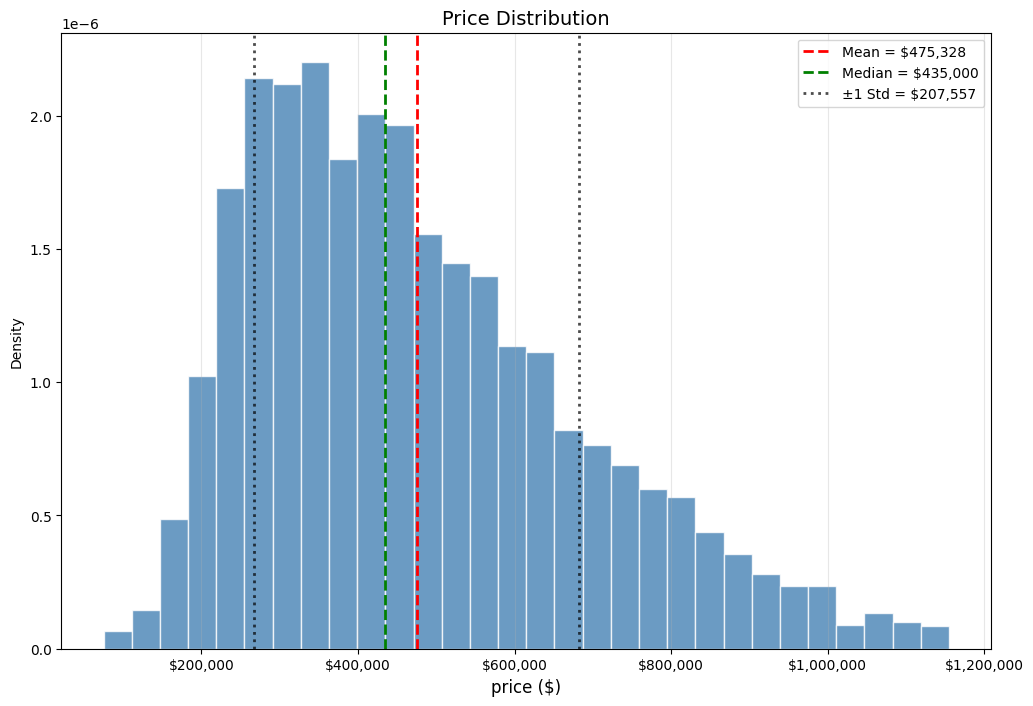

In [9]:
plt.figure(figsize=(12, 8))
plot_summary(df['price'], "Price Distribution")
plt.show()

The distribution is right skewed 

The mean is pulled to the right by the higher-priced houses

The median represents the middle value of the dataset, and it's less affected by extreme values.

Even though this is not a normal distribution $\approx$68% of the data is within the 1st STD 

# Visualization:  How does the other metrics affect the price 

## Avg Price and Transactions across months 

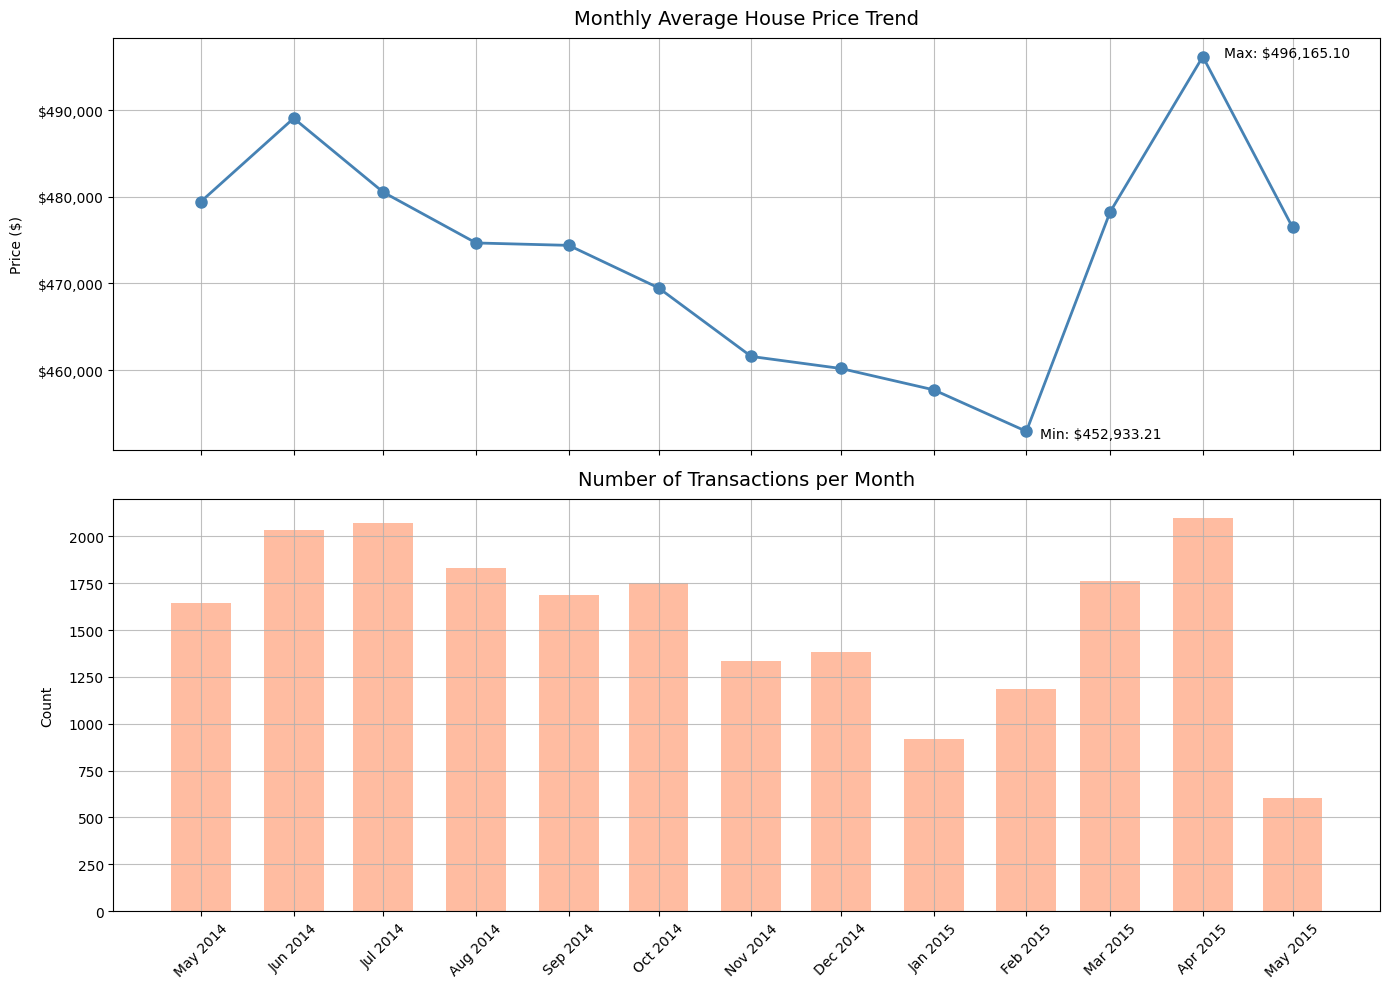

In [10]:
from matplotlib.dates import DateFormatter, MonthLocator

# Group by year and month, then calculate mean price and count
monthly_stats = df.groupby(df['date'].dt.to_period('M'))['price'].agg(['mean', 'count'])
monthly_stats.index = monthly_stats.index.to_timestamp()

# Create figure with two subplots (price trend and transaction count)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 1: Price Trend
ax1.plot(monthly_stats.index, monthly_stats['mean'], 
         marker='o', linestyle='-', color='steelblue', linewidth=2, markersize=8)
ax1.set_title('Monthly Average House Price Trend', pad=10, fontsize=14)
ax1.set_ylabel('Price ($)', labelpad=10)
ax1.grid(True, alpha=0.8)

# Format y-axis as currency
ax1.yaxis.set_major_formatter('${x:,.0f}')

# Plot 2: Transaction Count
ax2.bar(monthly_stats.index, monthly_stats['count'], 
        color='lightsalmon', alpha=0.7, width=20)
ax2.set_title('Number of Transactions per Month', pad=10, fontsize=14)
ax2.set_ylabel('Count', labelpad=10)
ax2.grid(True, alpha=0.8)

# Format x-axis
date_format = DateFormatter('%b %Y')
month_locator = MonthLocator(interval=1)  # Show every month

for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(month_locator)
    ax.tick_params(axis='x', rotation=45)

# Add value annotations for peaks/valleys
max_price = monthly_stats['mean'].max()
min_price = monthly_stats['mean'].min()

ax1.annotate(f'Max: ${max_price:,.2f}', 
             xy=(monthly_stats['mean'].idxmax(), max_price),
             xytext=(15, 0), textcoords='offset points')
ax1.annotate(f'Min: ${min_price:,.2f}', 
             xy=(monthly_stats['mean'].idxmin(), min_price),
             xytext=(10, -5), textcoords='offset points')

plt.tight_layout()
plt.show()

The trend of the average sales price appears to correlate with the number of transactions per month. However, it's important to recognize that this correlation doesn't imply that specific months cause more purchases. Individual financial situations, overall market conditions, and other non-temporal factors are likely the primary drivers of house buying decisions. Therefore, to avoid introducing potentially misleading temporal patterns into our model, we will exclude the date and month columns during training.

## Importance of other features with respect to price

## Affect of bedrooms on price

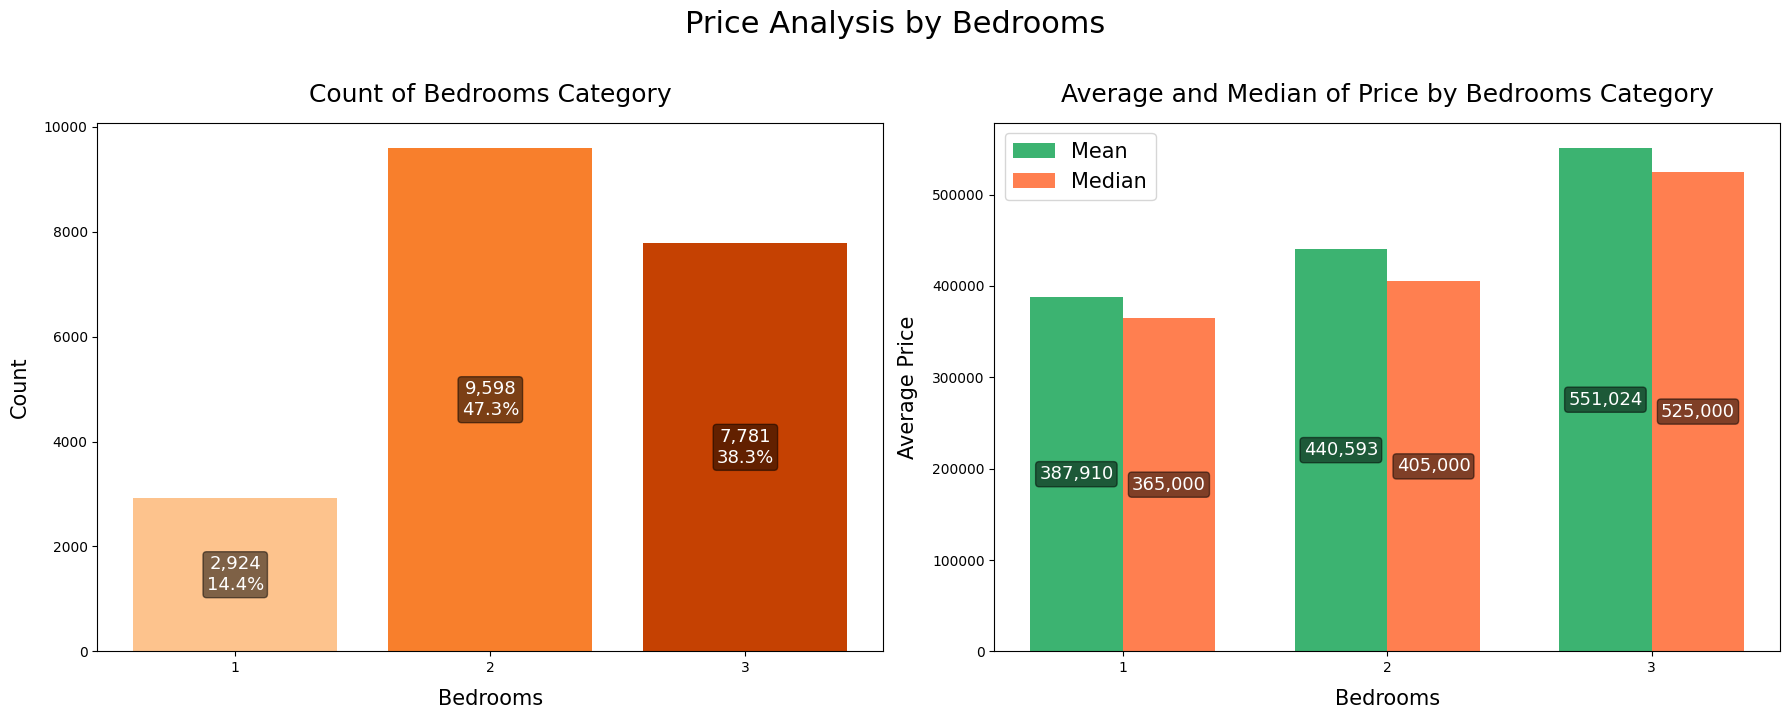

In [11]:
custom_plot(df, 'bedrooms', 'price', 'Bedrooms')

The distribution of houses in this dataset, as shown in the 'Count of bedrooms' chart, indicates that 2-bedroom and 3-bedroom properties are the most prevalent, significantly outnumbering 1-bedroom units. Correspondingly, the 'Average price by bedrooms' chart clearly demonstrates a general trend of increasing average house prices with a higher number of bedrooms. This suggests a positive correlation between the number of bedrooms and the average property value in this dataset, which aligns with the intuitive understanding that larger houses typically command higher prices.

## House Grade(Quality Level)

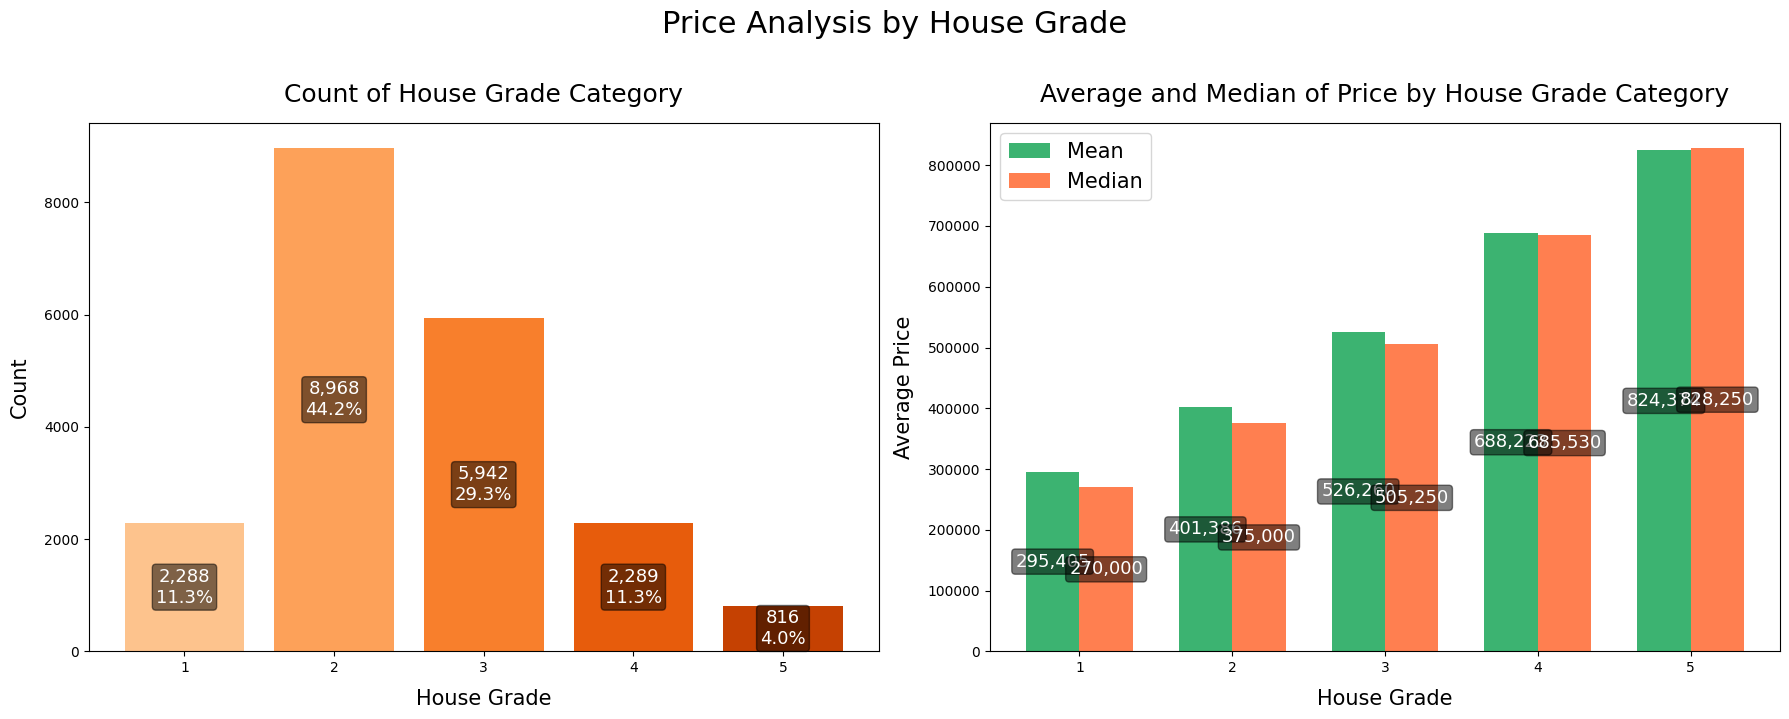

In [12]:
custom_plot(df, "grade", "price", "House Grade")

The 'Count of House Grade Category' bar chart reveals that Grade 2 and Grade 3 houses constitute the majority of the properties in this dataset, significantly outnumbering houses of other grades.

In 'Average and Median of Price by House Grade Category' chart, we observe that the mean prices for Grades 1, 2, and 3 are notably higher than their respective median prices. This discrepancy between the mean and median suggests a right-skewed price distribution within these grades, likely influenced by the presence of some higher-priced outlier properties that pull the average upwards.

Lets look at a violin plot to visualize the mean, median and the distribution of the house grade.

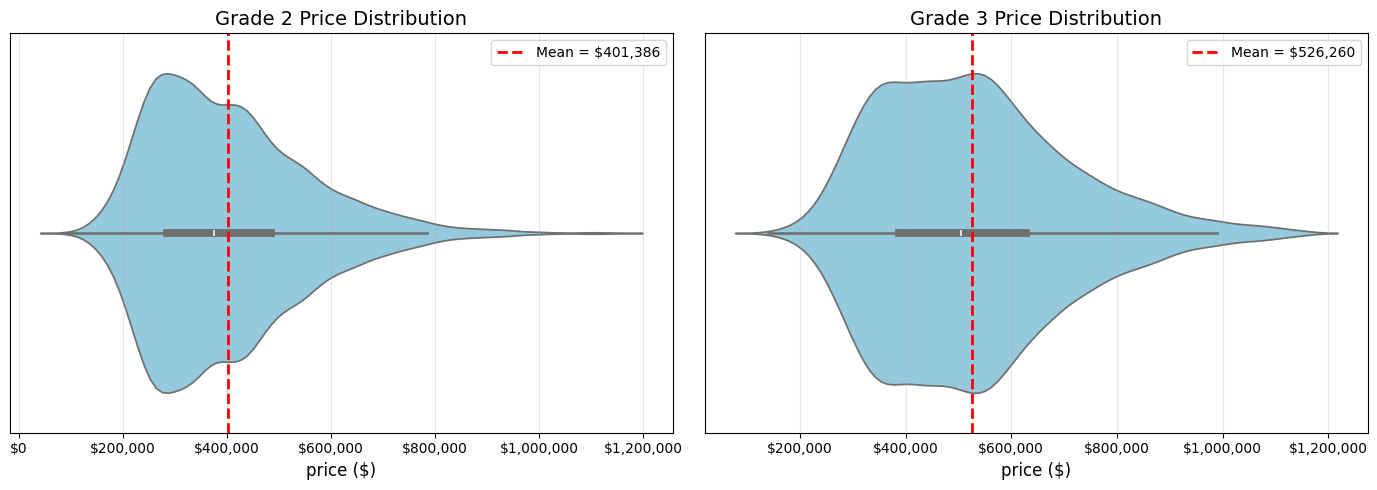

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

col1 = df[df['grade'] == 2]['price']
col2 = df[df['grade'] == 3]['price']

plot_price_violin(col1, title='Grade 2 Price Distribution', ax=axs[0])
plot_price_violin(col2, title='Grade 3 Price Distribution', ax=axs[1])

plt.tight_layout()
plt.show()

## Living space(living_in_m2) affect on price

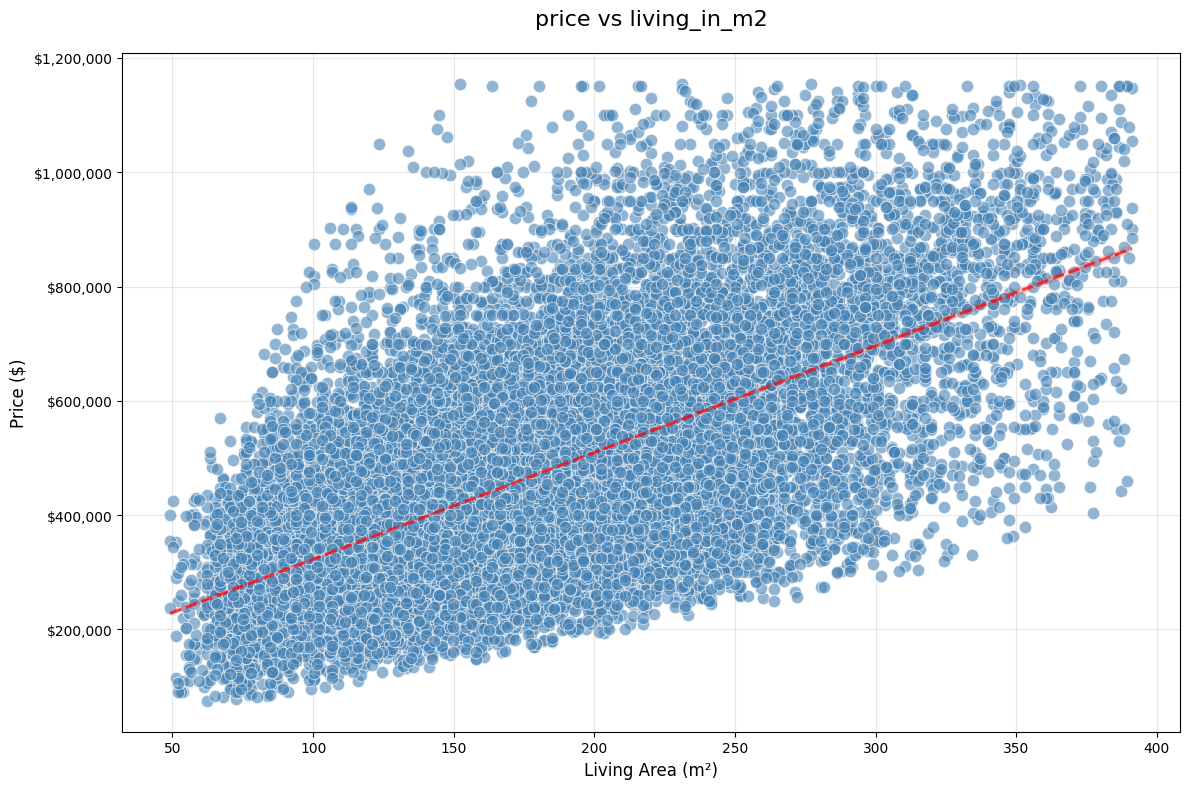

In [14]:
plt.figure(figsize=(12, 8))
plot_scatter(df, x_col="living_in_m2", y_col='price')

There is Heteroscedasticity

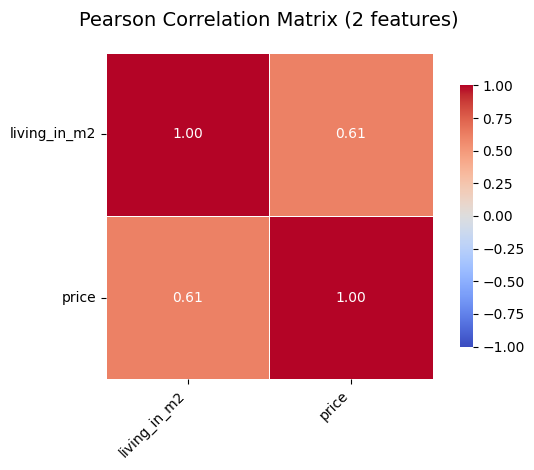

In [15]:
plot_correlation(data=df, columns=["living_in_m2", "price"])

There's a clear upward trend in the data. As the living area of a house increases, the price generally tends to increase as well. 

While there's a positive trend, there's also a significant amount of scatter. For any given living area, there's a wide range of prices. This indicates that other factors besides living area influence the price of a house.

A correlation of 0.61 indicates a moderate positive linear correlation.

## Price vs quartile_zone(A quartile distribution index of the most expensive zip codes, where 1 means less expansive and 4 most expansive.)

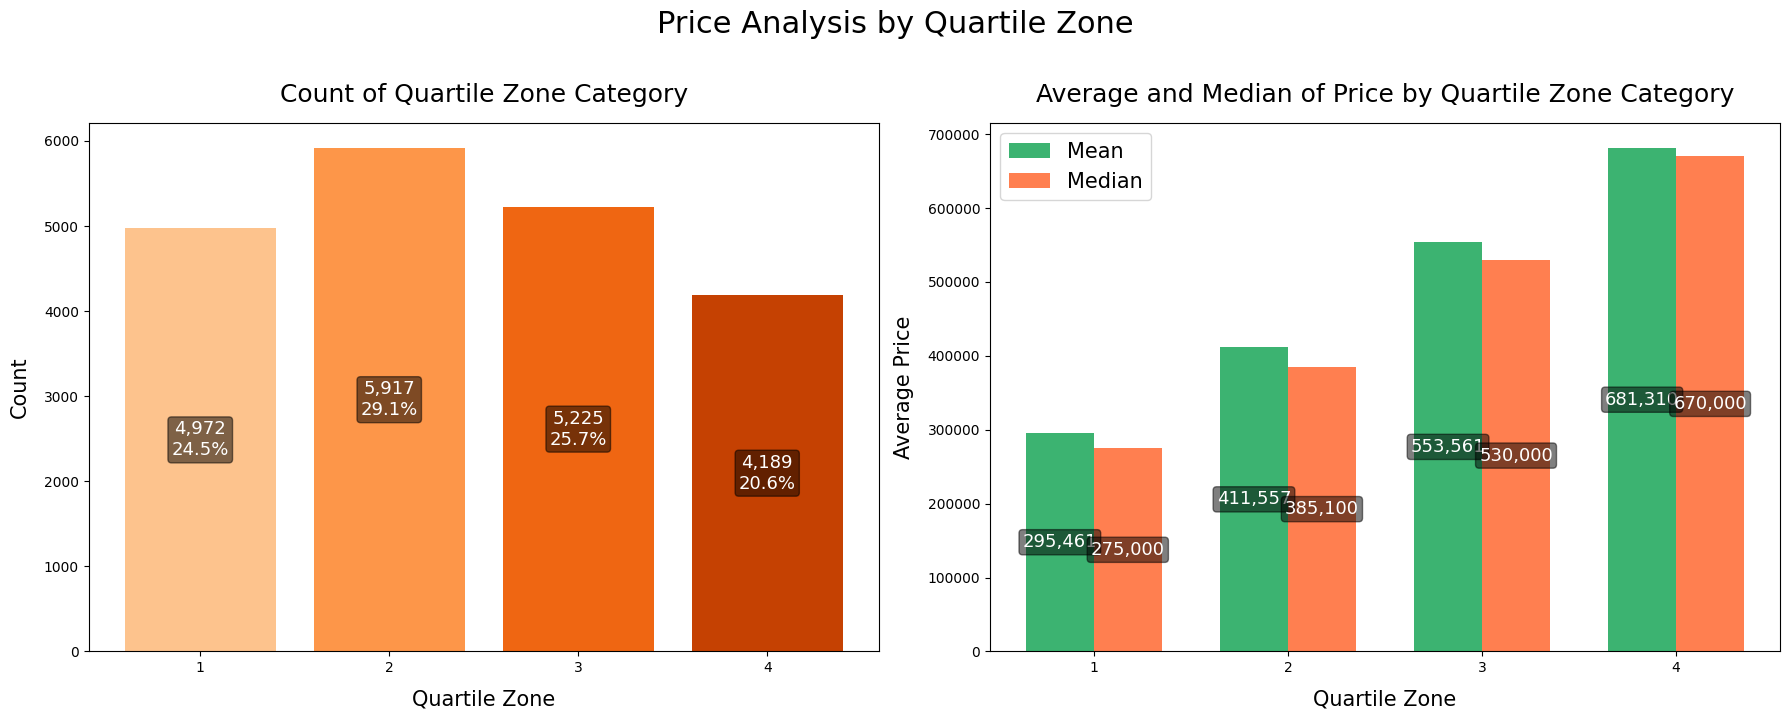

In [16]:
custom_plot(df, "quartile_zone", "price", "Quartile Zone")

The visualization highlights a strong positive correlation between the quartile zone of a location and house prices. As you move towards more expensive zip code quartiles, both the typical (median) and average house prices increase substantially. The difference between the mean and median prices in the higher quartile zones suggests the presence of outliers (very expensive houses) within those areas, which is something you've rightly decided to investigate further with a violin plot.

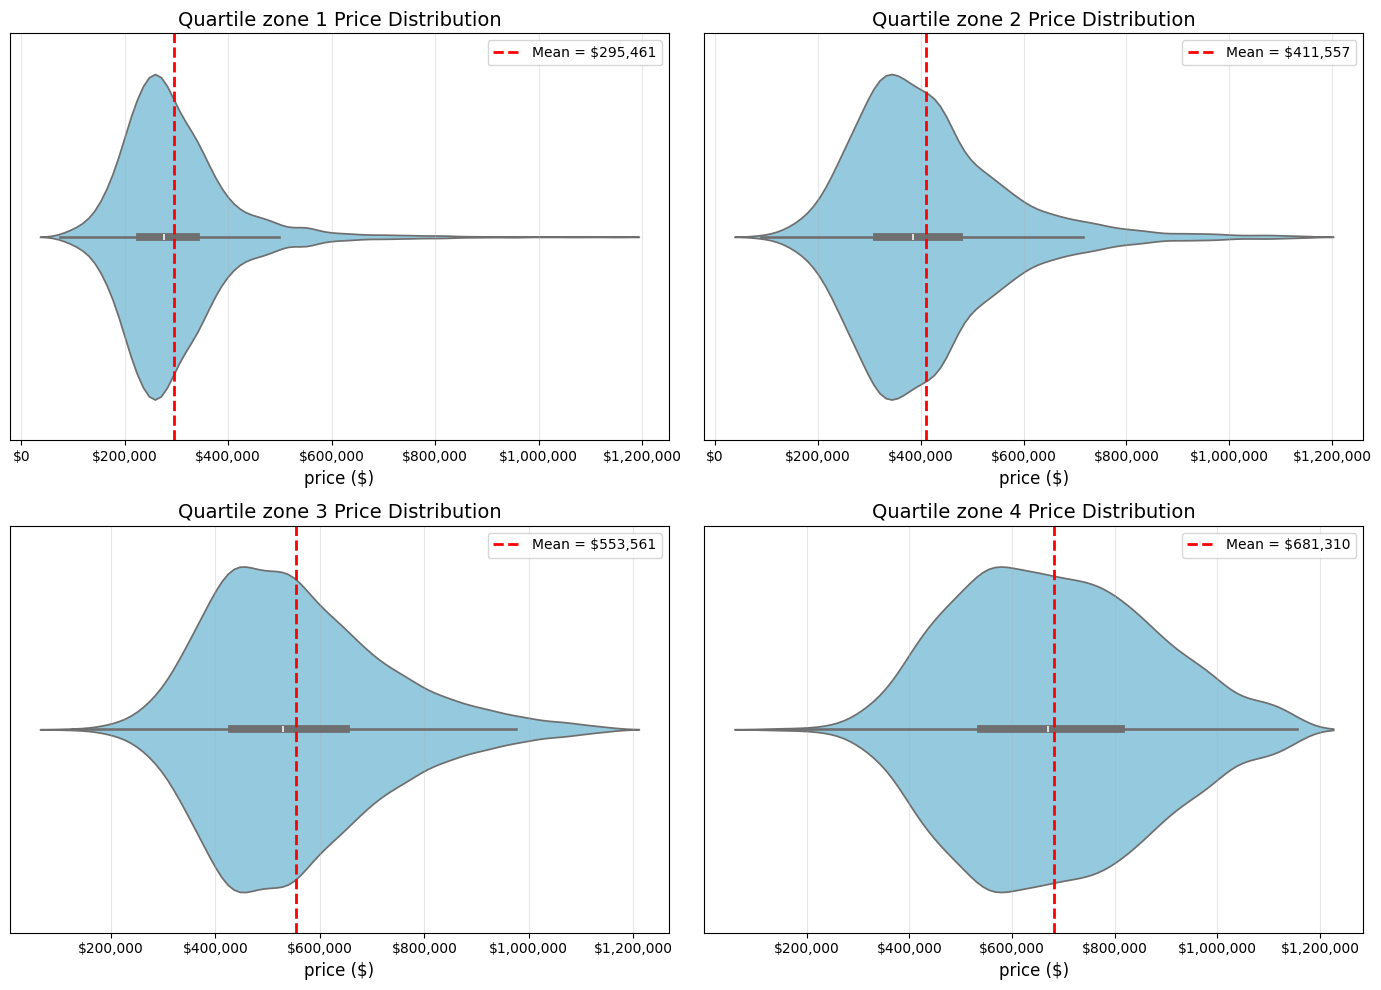

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i in range(4):
    col = df[df['quartile_zone'] == i + 1]['price']
    plot_price_violin(col, title=f'Quartile zone {i + 1} Price Distribution', ax=axs[i])

plt.tight_layout()
plt.show()

There are outliers in the lower quartile zones that need to be addressed, as we don't want our model to overpredict property values. Instead of removing outliers based on global percentiles which might eliminate high-grade properties we can focus on removing outliers specifically within the lower quartile zones.

## Lets check some of the binary variable distribution in the dataset

## Basement

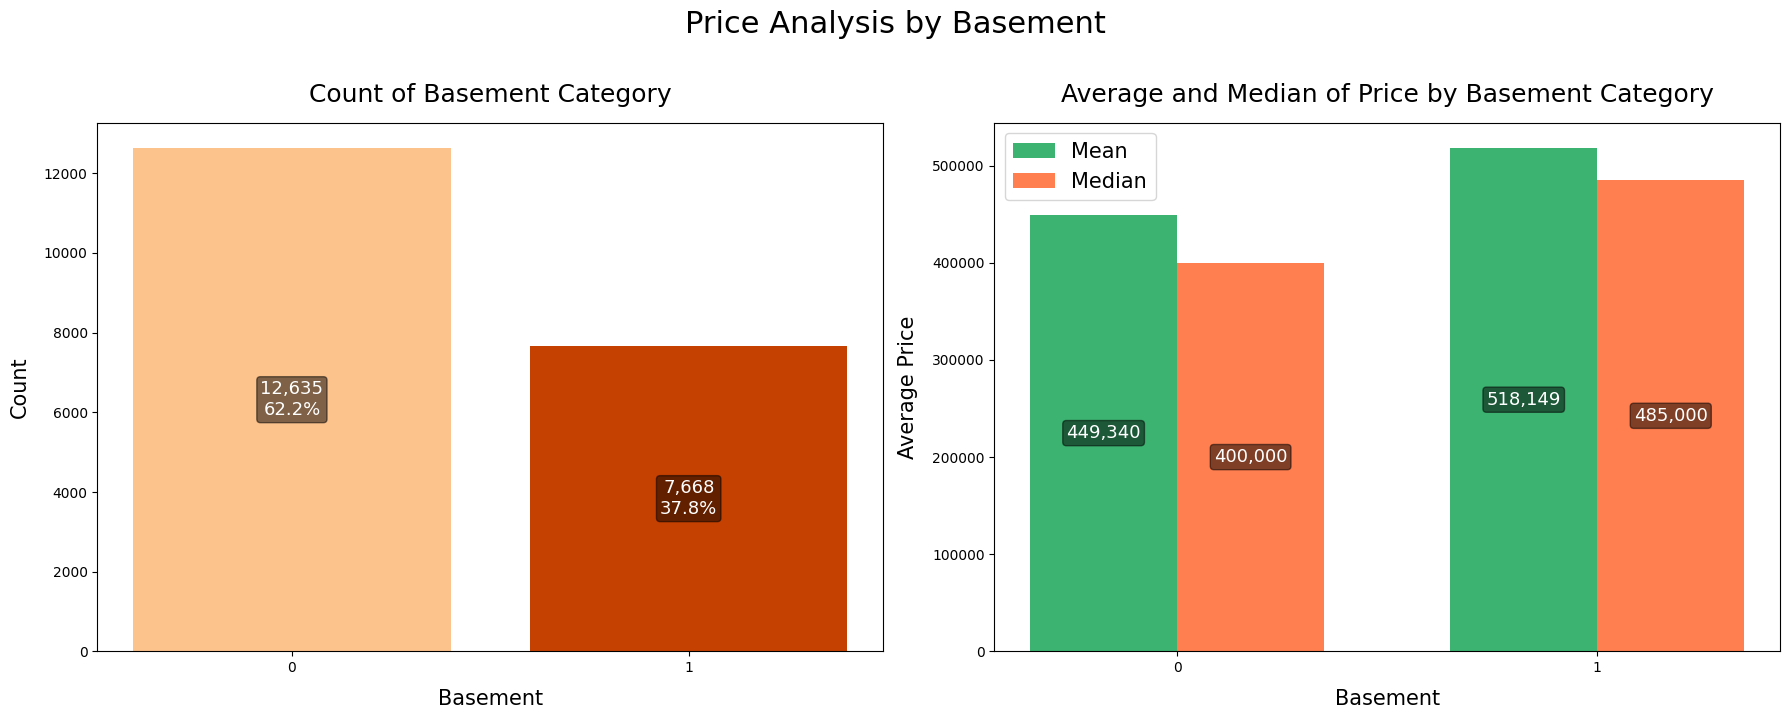

In [18]:
custom_plot(df, "has_basement", "price", "Basement")

Having a basement tends to correlate with higher prices, likely due to the added value and construction cost associated with it. While the distribution between homes with and without basements is somewhat uneven, it is not severely imbalanced and should not negatively affect the model.

Price difference: $\approx$69K in the mean, $\approx$85K in the median: that's significant.

This variable should be retained as a feature in modeling.

## Renovated

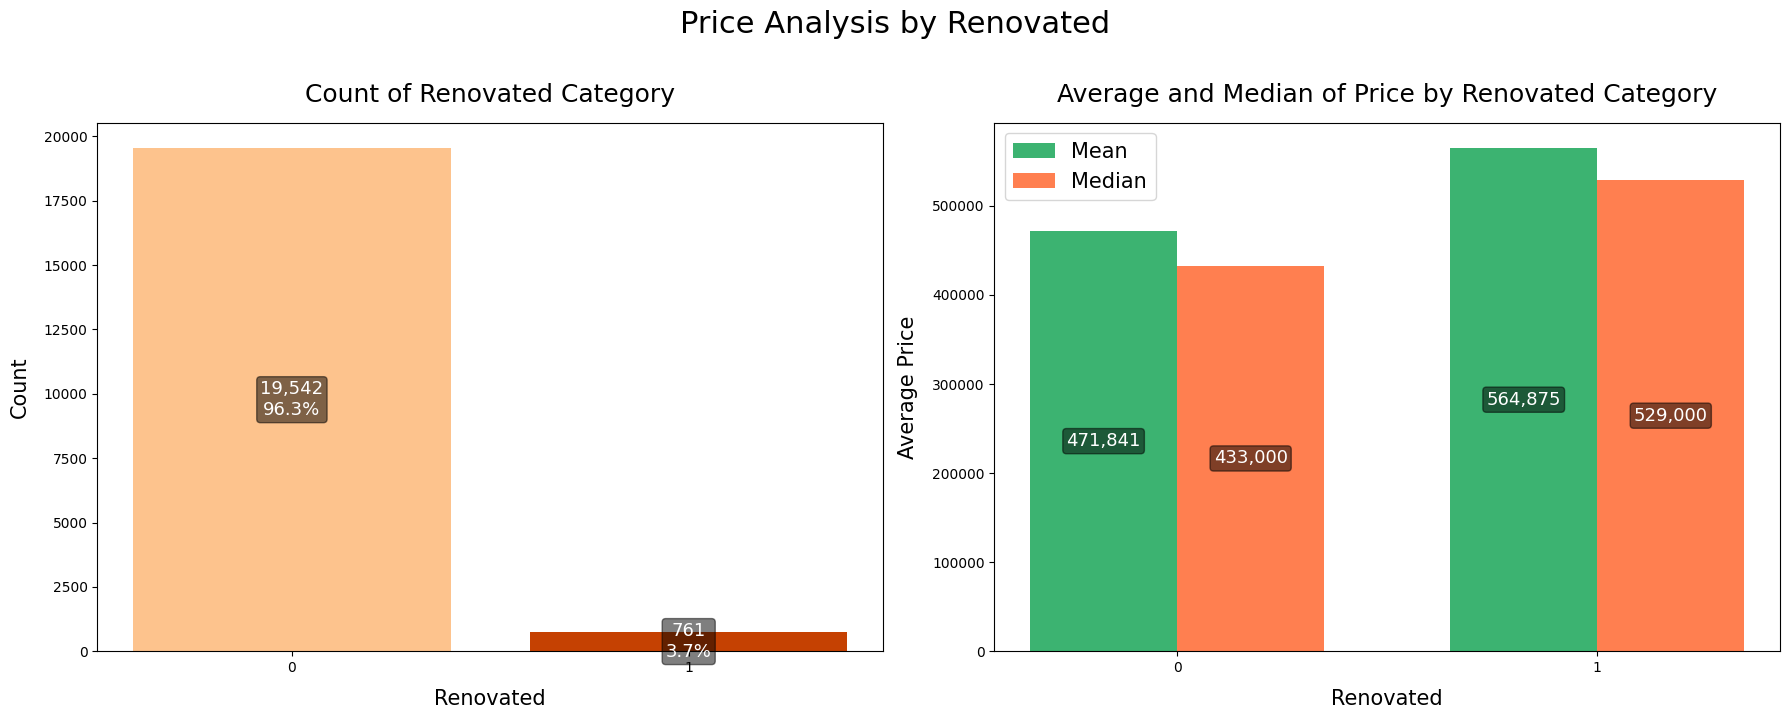

In [19]:
custom_plot(df, "renovated", "price", "Renovated")

## Nice View

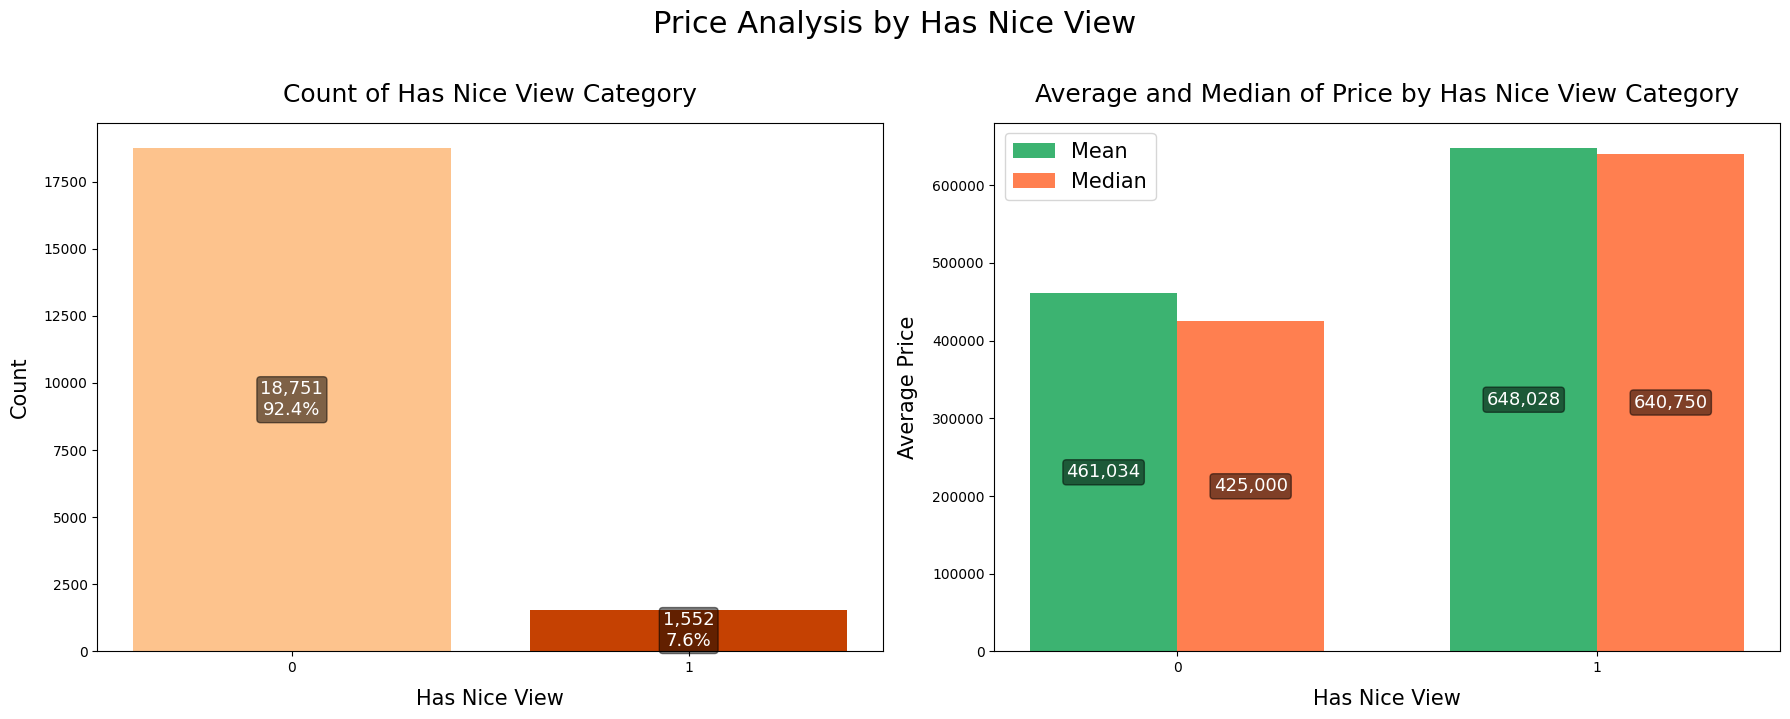

In [20]:
custom_plot(df, "nice_view", "price", "Has Nice View")

## Perfect Condition

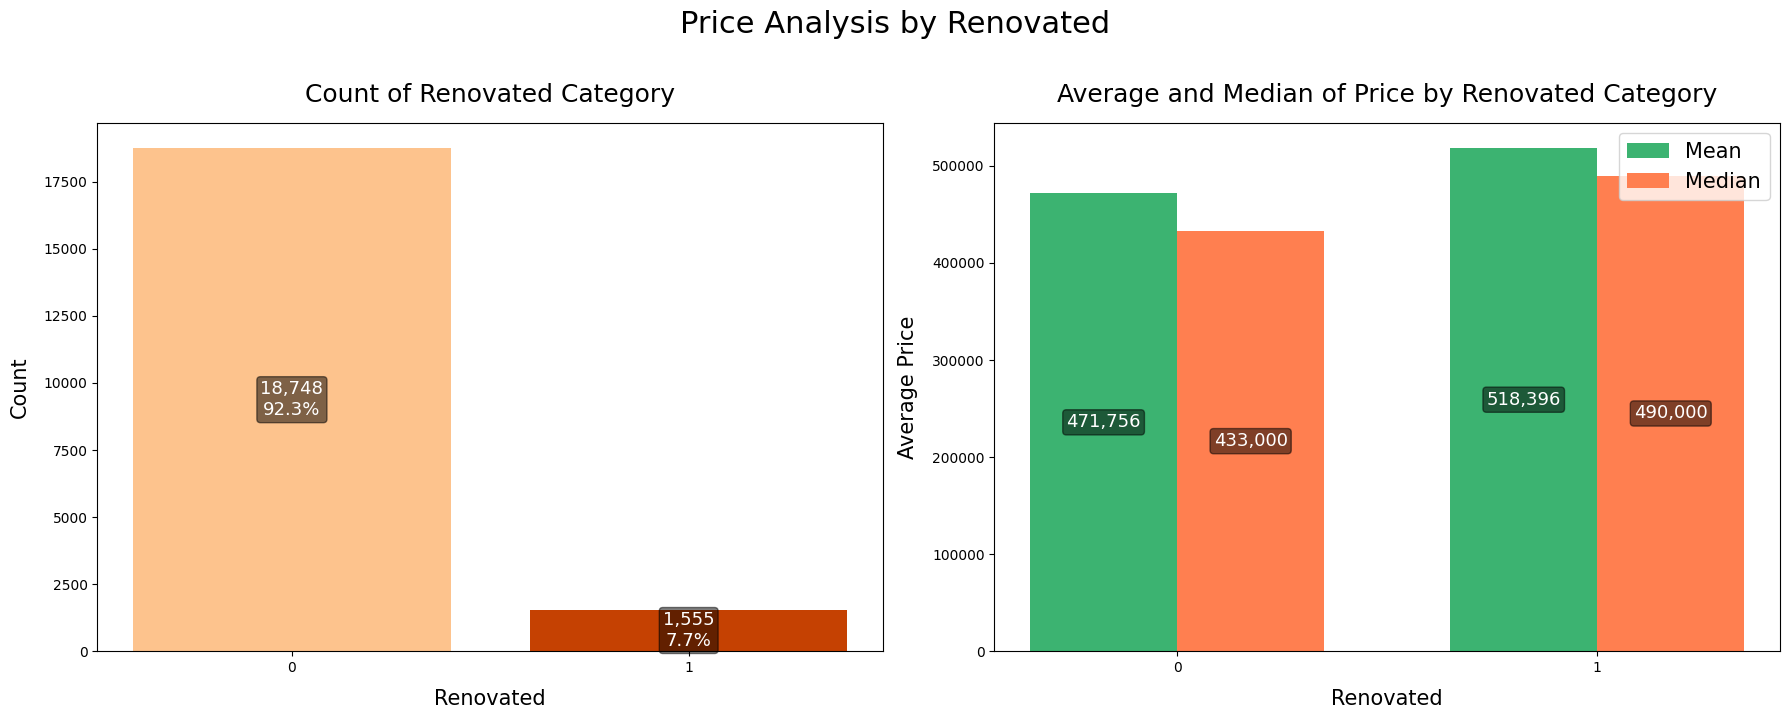

In [21]:
custom_plot(df, "perfect_condition", "price", "Renovated")

## Lavatory 

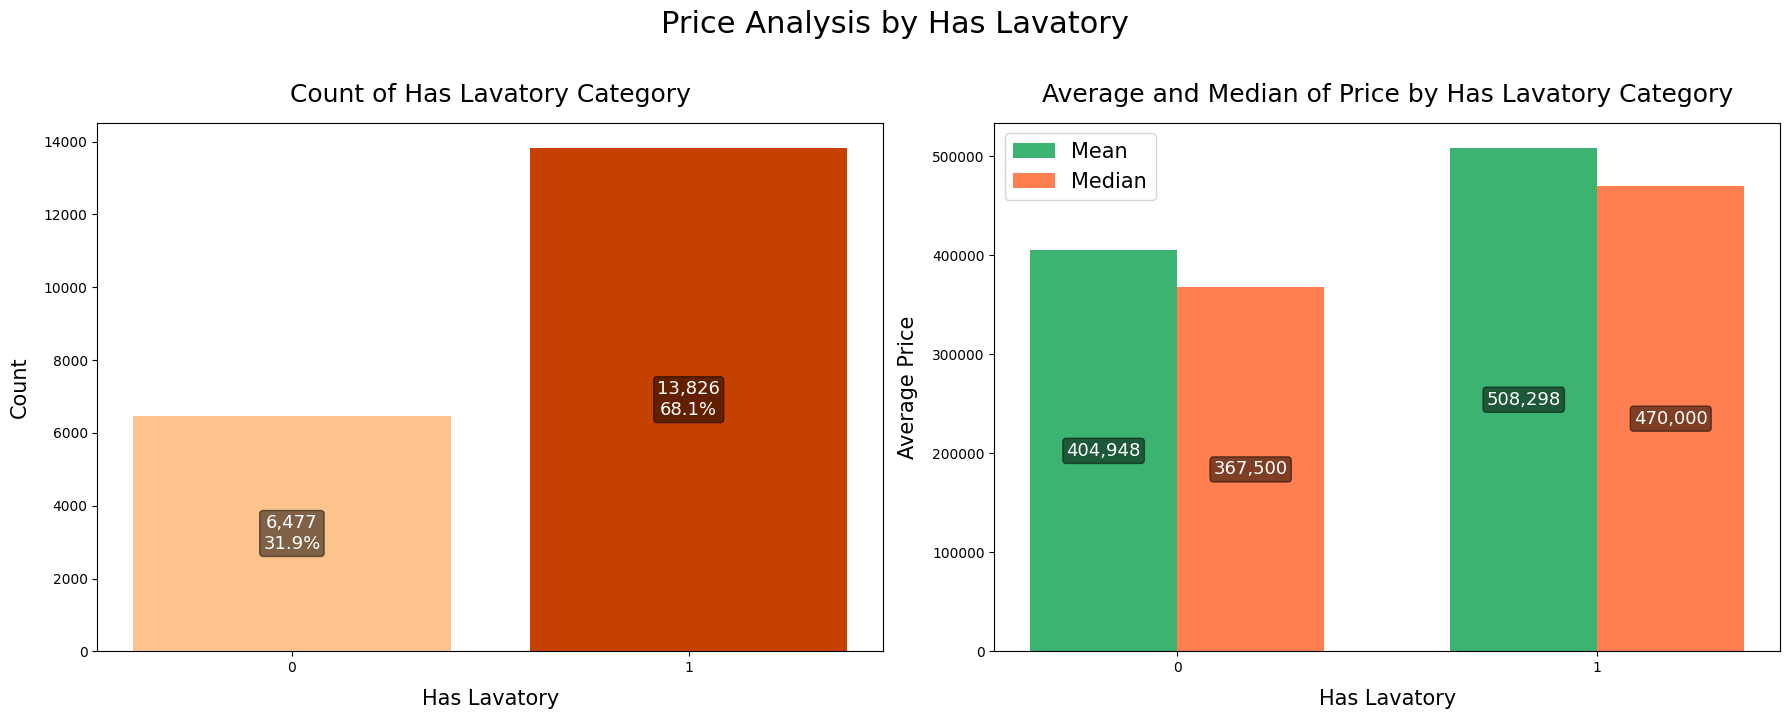

In [22]:
custom_plot(df, "has_lavatory", "price", "Has Lavatory")

## Single Floor

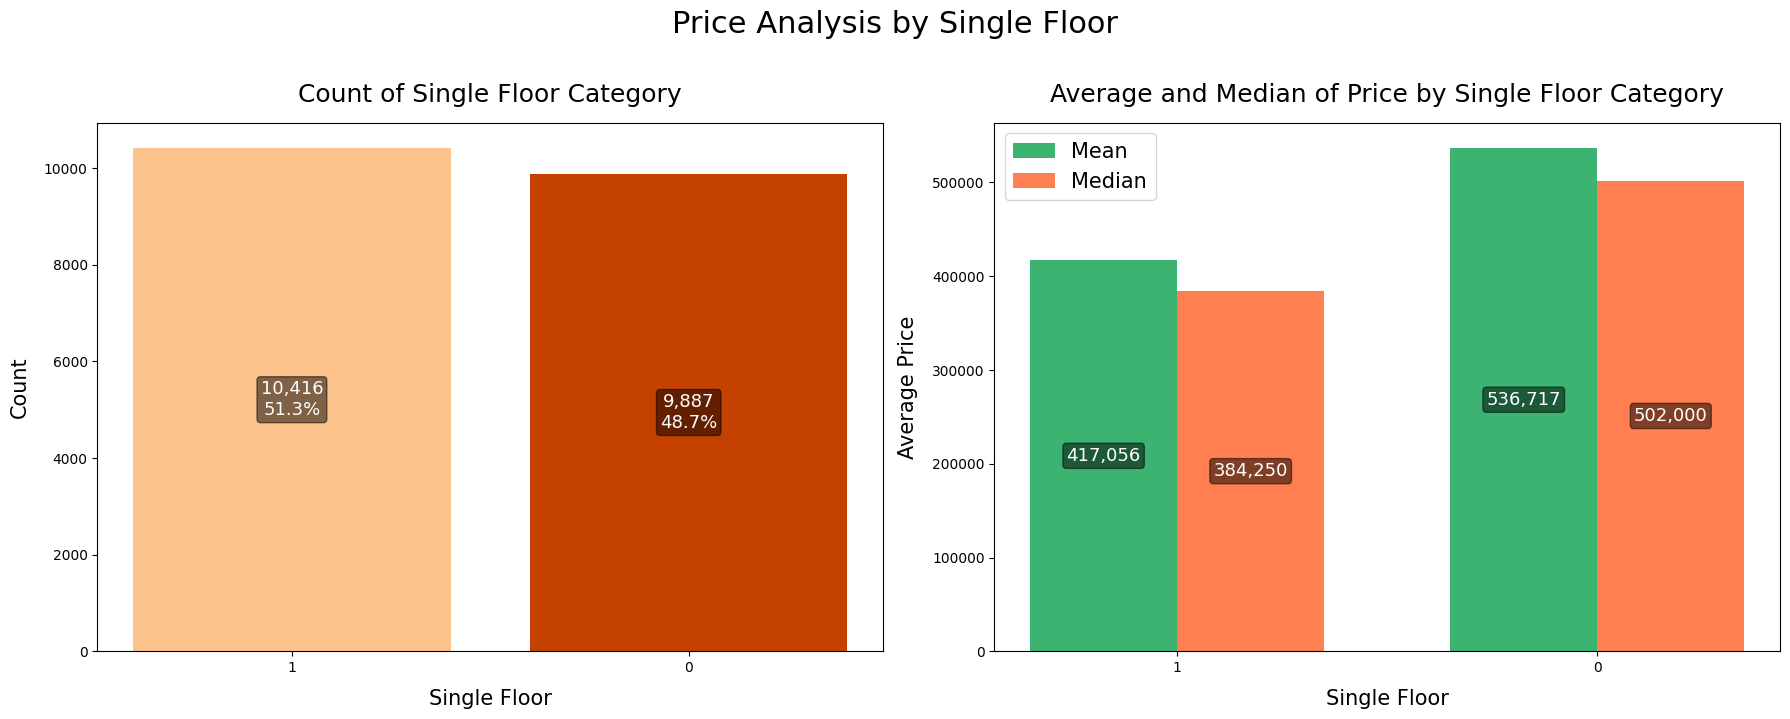

In [23]:
custom_plot(df, "single_floor", "price", "Single Floor")

The distributions of the `renovated`, `nice_view`, and `perfect_condition` features are highly imbalanced, with the minority categories showing significantly higher average prices. This suggests that these attributes are important price drivers and should be carefully considered before removing any outliers, as doing so without context may eliminate valuable, high-quality properties.

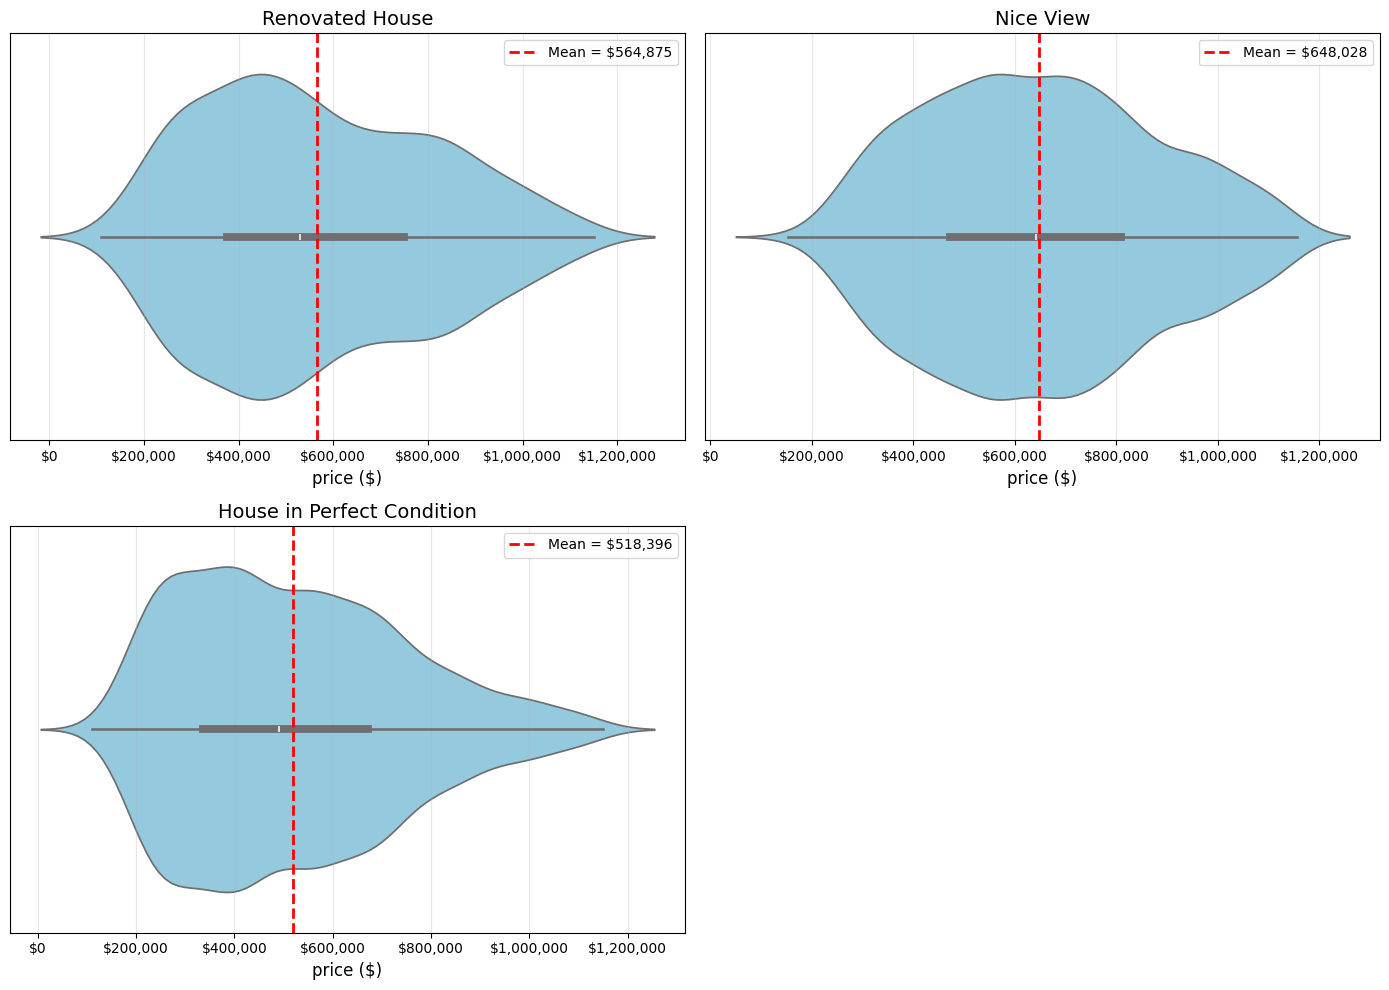

In [24]:
# Filter the data
renovated_yes = df[df['renovated'] == 1]['price']
nice_view_yes = df[df['nice_view'] == 1]['price']
perfect_condition_yes = df[df['perfect_condition'] == 1]['price']

cols = [renovated_yes, nice_view_yes, perfect_condition_yes]
titles = ["Renovated House", "Nice View", "House in Perfect Condition"]

# Create 2x2 grid but only use 3 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the array for easy iteration
axs = axs.flatten()

# Plot on the first 3 subplots
for i in range(3):
    plot_price_violin(cols[i], title=titles[i], ax=axs[i])

# Remove the 4th subplot (index 3)
fig.delaxes(axs[3])

# Adjust layout to account for the removed subplot
plt.tight_layout()
plt.show()

As shown in the violin plots, the minority classes in renovated, nice_view, and perfect_condition categories are associated with significantly higher prices. Despite their imbalanced distributions, these features are valuable indicators of property value. Therefore, outlier treatment should consider these attributes to avoid inadvertently removing high-value, legitimate data points.

Lets look at the quartile 1 and houses that are not renovated to see if there are outliers

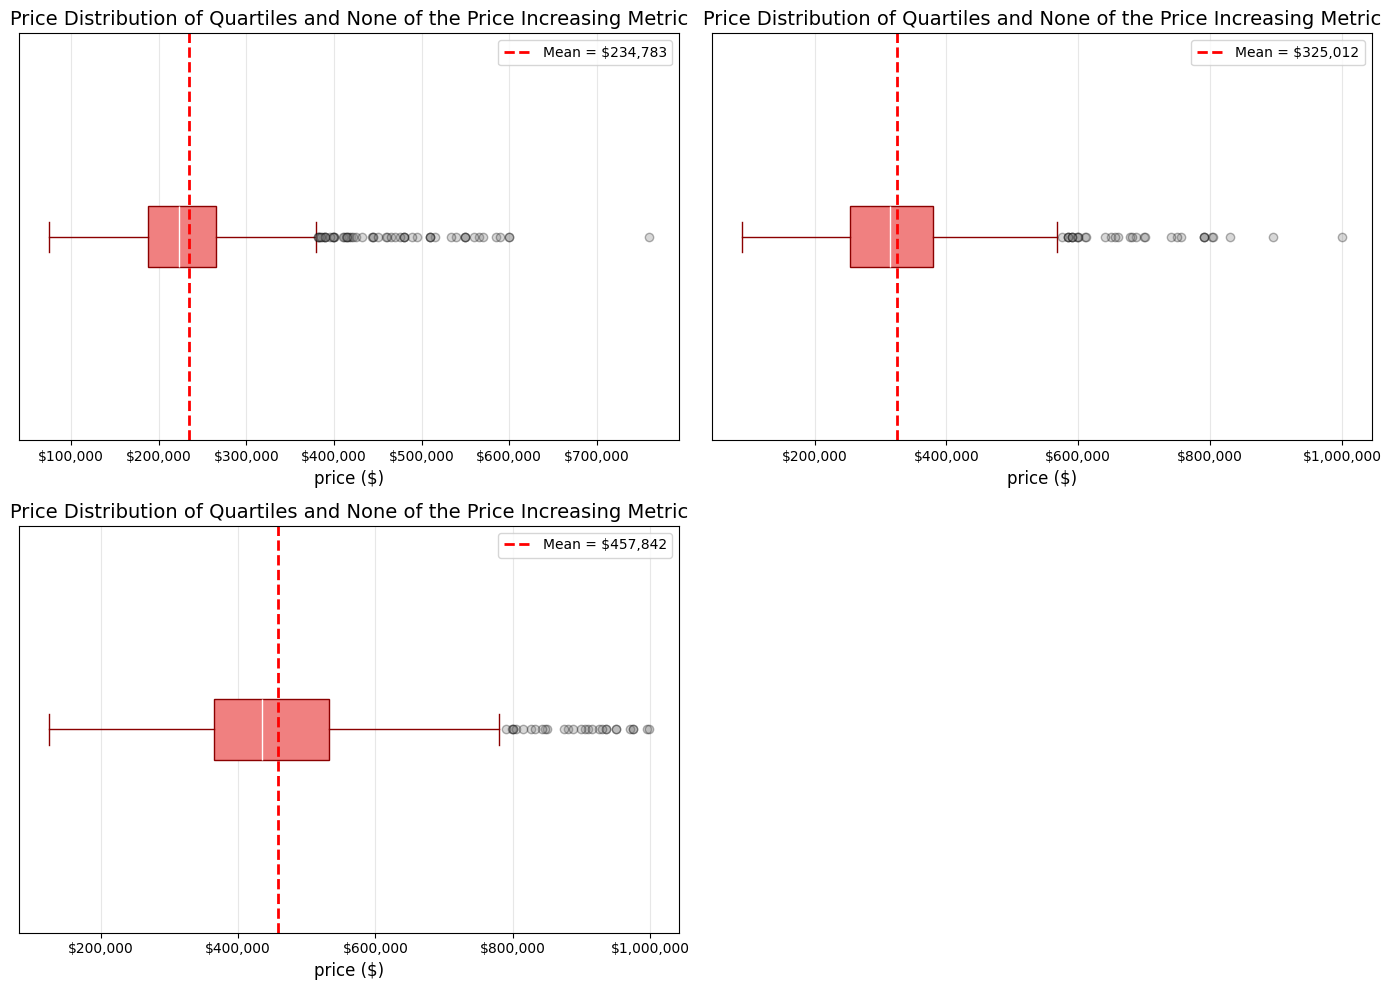

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the array for easy iteration
axs = axs.flatten()

# Plot on the first 3 subplots
for i in range(3):
    mask = ((df['quartile_zone'] == i + 1) & 
            (df['renovated'] == 0) &
            (df['nice_view'] == 0) &
            (df['perfect_condition'] == 0) &
            (df['has_basement'] == 0) & 
            (df['has_lavatory'] == 0))
    
    col = df[mask]['price']
    
    plot_summary(col, 
                 "Price Distribution of Quartiles and None of the Price Increasing Metric",
                 plot_type="box", ax=axs[i])
    
# Remove the 4th subplot (index 3)
fig.delaxes(axs[3])

# Adjust layout to account for the removed subplot
plt.tight_layout()
plt.show()

Instead of removing outliers based solely on binary fields (e.g., renovated, nice view), which may overlook the influence of other important features, we will adopt a more comprehensive approach. Specifically, we will apply Multivariate Outlier Detection techniques such as Local Outlier Factor (LOF) to detect anomalies across multiple dimensions. If we observe any overlap in the outliers identified by these methods, we will consider removing those data points to improve model reliability.

# Removing outliers using IsolationForest and Local Outlier Factor 

We will do both and remove outliers that overlap

In [26]:
# Filter the dataset by removing the binary fields.
# using binary fields with 

from sklearn.preprocessing import OrdinalEncoder

mask = (
    (df['renovated'] == 0) &
    (df['nice_view'] == 0) &
    (df['perfect_condition'] == 0) &
    (df['has_basement'] == 0) & 
    (df['has_lavatory'] == 0)
)

df_filtered = df[mask].copy()
df_filtered = df_filtered.drop(columns=["date", "month"])

categorical_cols = ['bedrooms', 'grade', 'real_bathrooms', 'quartile_zone']
encoders = {}
for col in categorical_cols:
    encoder = OrdinalEncoder(categories=[sorted(df_filtered[col].unique())]) # Ensure correct order if known
    df_filtered[f'{col}_encoded'] = encoder.fit_transform(df_filtered[[col]])
    encoders[col] = encoder


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Select features
features = ['price', 'living_in_m2', 'grade_encoded', 'real_bathrooms_encoded', 'bedrooms_encoded', 'quartile_zone_encoded']
X = df_filtered[features].copy()

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Isolation Forest
iso_forest = IsolationForest(contamination='auto', random_state=42) # 'auto' estimates outlier ratio
outlier_predictions = iso_forest.fit_predict(X_scaled)

# Add outlier labels to the DataFrame
df_filtered['is_outlier_isoforest'] = outlier_predictions

# Examine the number of outliers
display(df_filtered['is_outlier_isoforest'].value_counts())

In [28]:
from sklearn.neighbors import LocalOutlierFactor

features = ['price', 'living_in_m2', 'grade_encoded', 'real_bathrooms_encoded', 'bedrooms_encoded', 'quartile_zone_encoded']
X = df_filtered[features].copy()

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto') # Adjust n_neighbors
outlier_scores = lof.fit_predict(X_scaled)

# Add outlier labels to the DataFrame
df_filtered['is_outlier_lof'] = outlier_scores

# Examine the number of outliers
print(df_filtered['is_outlier_lof'].value_counts())

is_outlier_lof
 1    3439
-1     302
Name: count, dtype: int64


In [29]:
overlap_mask = (
    (df_filtered['is_outlier_isoforest'] == -1) &
    (df_filtered['is_outlier_lof'] == -1) 
)
print(f"Overlapping outliers: {overlap_mask.sum()}")

Overlapping outliers: 180


In [30]:
df_filtered_cleaned = df_filtered[~overlap_mask].copy()
print(f"Cleaned dataset shape: {df_filtered_cleaned.shape}")

Cleaned dataset shape: (3561, 18)


In [31]:
# Get indices of overlapping outliers
outlier_indices = df_filtered[overlap_mask].index

# Remove from the original df
df_cleaned = df.drop(index=outlier_indices)
print(f"Original dataset after outlier removal: {df_cleaned.shape}")

Original dataset after outlier removal: (20123, 14)


# Correlation Check

<Axes: >

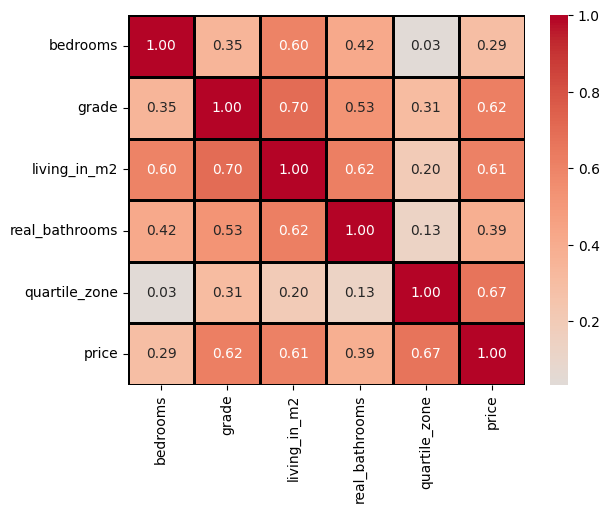

In [32]:
# Check for correlation for the contiguous fields

cols = ["bedrooms", "grade", "living_in_m2", "real_bathrooms", "quartile_zone", "price"]

# Correlation Matrix

corr_df = df.loc[:, cols]
sns.heatmap(corr_df.corr(),
           annot=True,
           fmt='.2f',
           center=0,
           cmap='coolwarm',
           linecolor='black',
           linewidths=1)

# Check for multi co-linearity 

<Axes: >

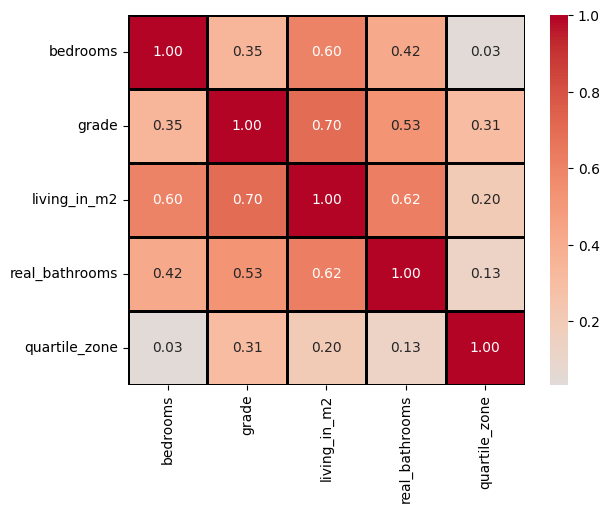

In [33]:
corr_df = df.loc[:, cols[: -1]]
sns.heatmap(corr_df.corr(),
           annot=True,
           fmt='.2f',
           center=0,
           cmap='coolwarm',
           linecolor='black',
           linewidths=1)

**Initial**
Due to strong collinearity among features, we initially planned to remove variables after testing. As a first step, we removed `bedrooms` and `real_bathrooms` since they had the weakest correlation with price, and are conceptually related to `living_in_m2`.

**After Testing**
After testing the model with and without these features, the $R^2$ score remained unchanged, and only minor variations were observed in the predictions. This suggests that `bedrooms` and `real_bathrooms` provide additional, non-redundant information. Therefore, it is better to retain them in the model as they do not negatively impact performance.

In [34]:
cols_to_remove = ["month", "date"]

df = df.drop(columns=cols_to_remove)

# MLR prep

In [35]:
import statsmodels.api as sm

In [36]:
# Isolate X and y

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# add constant 
X = sm.add_constant(X)

# Test train split

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)  # changed from y
y_train = np.log(y_train)

In [38]:
from sklearn.preprocessing import StandardScaler

# Define your continuous columns
continuous_cols = ["grade", "living_in_m2", "quartile_zone", "bedrooms", "real_bathrooms"]

# Binary columns are the rest of the features
binary_cols = [col for col in X_train.columns if col not in continuous_cols]

# Split continuous and binary
X_train_cont = X_train[continuous_cols]
X_test_cont = X_test[continuous_cols]

X_train_bin = X_train[binary_cols]
X_test_bin = X_test[binary_cols]

# Scale continuous features
sc = StandardScaler()
X_train_cont_scaled = sc.fit_transform(X_train_cont)
X_test_cont_scaled = sc.transform(X_test_cont)

# Convert scaled arrays back to DataFrames
X_train_cont_scaled = pd.DataFrame(X_train_cont_scaled, columns=continuous_cols, index=X_train.index)
X_test_cont_scaled = pd.DataFrame(X_test_cont_scaled, columns=continuous_cols, index=X_test.index)

# Concatenate scaled continuous and original binary features
X_train_processed = pd.concat([X_train_bin, X_train_cont_scaled], axis=1)
X_test_processed = pd.concat([X_test_bin, X_test_cont_scaled], axis=1)


# Train the model

In [39]:
model = sm.OLS(y_train, X_train_processed).fit()

# Summary

In [40]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     4453.
Date:                Fri, 02 May 2025   Prob (F-statistic):               0.00
Time:                        23:26:17   Log-Likelihood:                 1406.3
No. Observations:               16242   AIC:                            -2789.
Df Residuals:                   16230   BIC:                            -2696.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.9600      0.00

# Prediction 

In [41]:
y_pred = model.predict(X_test_processed)
y_pred = np.exp(y_pred)
y_pred[: 4]

11550    412377.313757
8937     433982.521965
6142     690740.743136
13112    410794.900936
dtype: float64

# Metrics

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(f"MAE: {mean_absolute_error(y_test, y_pred): .2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred): .2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)): .3f}")

MAE:  79267.75
MSE:  11919110630.69
RMSE:  109174.679


# Residual Plot

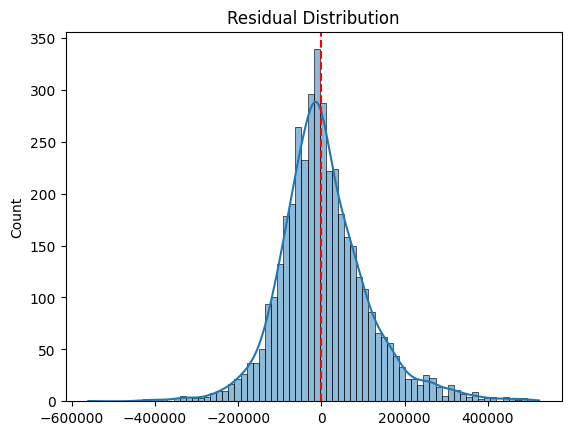

In [43]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

# Lets try other models

In [44]:
model_metrics = {}

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name=None):
    # Fit model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)
    y_pred = np.exp(y_pred)

    # Metrics
    r2 = round(r2_score(y_test, y_pred), 2)
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

    title = model_name or model.__class__.__name__
    
    model_metrics[title] = [r2, mae, rmse]
    
    print(f"\n----- {title} -----")
    print(f"R2 Score  : {r2}")
    print(f"MAE       : {mae}")
    print(f"RMSE      : {rmse}")

    # Residuals
    residuals = y_test - y_pred

    # Plot setup
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    sns.set(style="whitegrid")

    # 1. Residuals vs Predicted
    sns.scatterplot(x=y_pred, y=residuals, ax=axs[0], color='steelblue', alpha=0.6)
    axs[0].axhline(0, color='red', linestyle='--')
    axs[0].set_title("Residuals vs Predicted")
    axs[0].set_xlabel("Predicted")
    axs[0].set_ylabel("Residuals")

    # 2. Actual vs Predicted
    axs[1].scatter(y_test, y_pred, alpha=0.6, c='steelblue', label='Actual')
    axs[1].scatter(y_test, y_test, alpha=0.3, c='orange', label='Predicted')  # Reference
    axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
    axs[1].set_title("Actual vs Predicted")
    axs[1].set_xlabel("Actual")
    axs[1].set_ylabel("Predicted")
    axs[1].legend()

    # 3. Histogram of Residuals
    sns.histplot(residuals, bins=30, kde=True, color='slateblue', ax=axs[2])
    axs[2].axvline(0, color='red', linestyle='--')
    axs[2].set_title("Distribution of Residuals")
    axs[2].set_xlabel("Residual (Actual - Predicted)")
    axs[2].set_ylabel("Frequency")

    plt.suptitle(f"Model Evaluation: {title}", fontsize=14)
    plt.tight_layout()
    plt.show()


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    
    "Random Forest": RandomForestRegressor(
        n_estimators=100, max_depth=None, random_state=42, n_jobs=-1
    ),
    
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
    ),
    
    "XGBoost": XGBRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42,
        n_jobs=-1, verbosity=0
    ),
    
    "LightGBM": LGBMRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42
    )
}



----- Linear Regression -----
R2 Score  : 0.72
MAE       : 79267.75
RMSE      : 109174.68


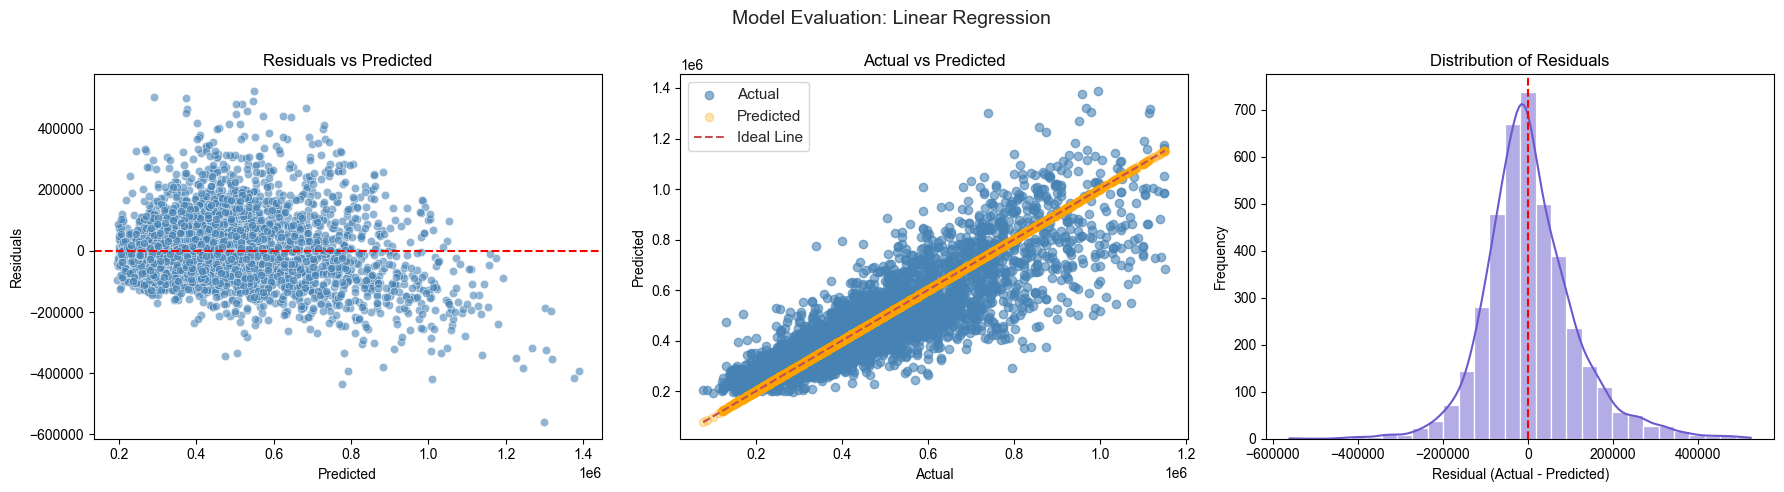


----- Random Forest -----
R2 Score  : 0.72
MAE       : 79059.09
RMSE      : 109213.63


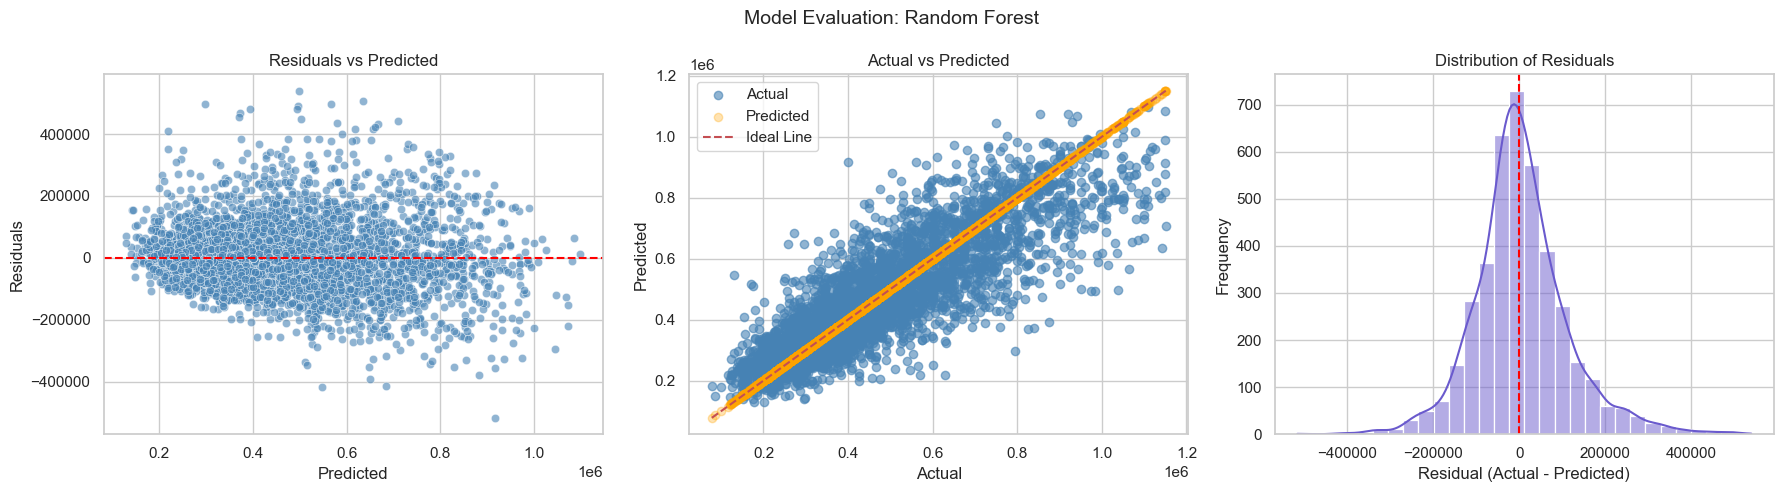


----- Gradient Boosting -----
R2 Score  : 0.76
MAE       : 72878.15
RMSE      : 100646.11


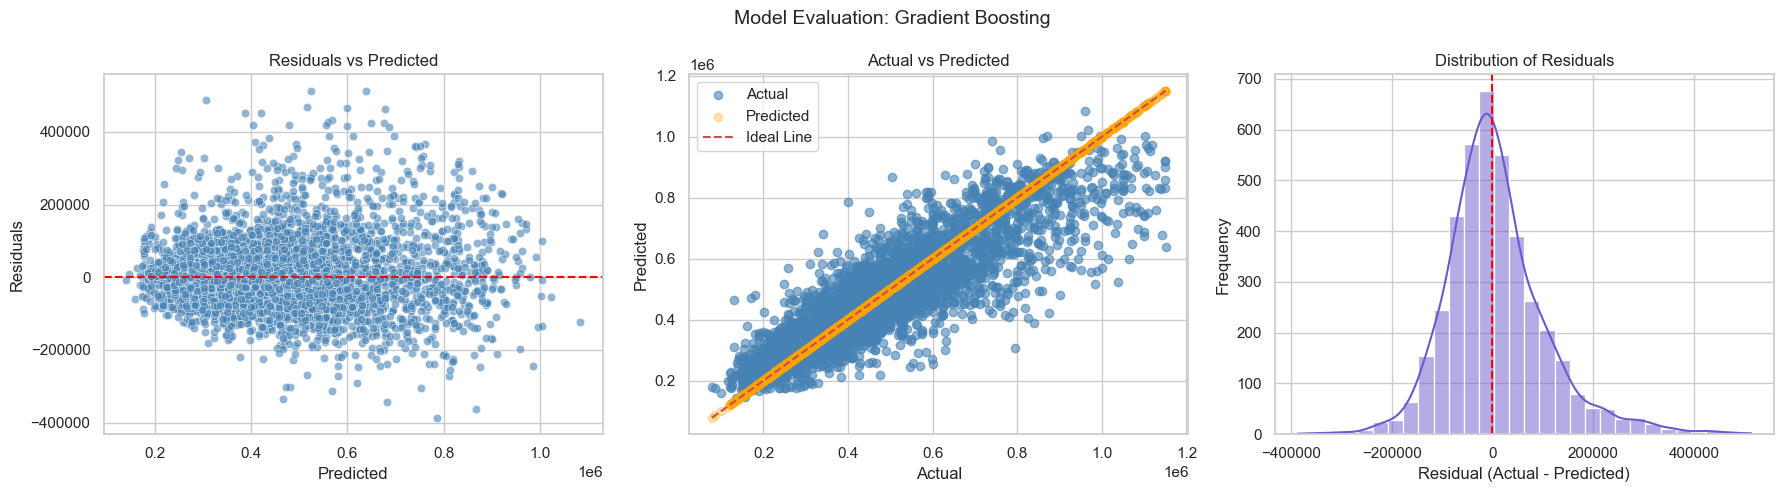


----- XGBoost -----
R2 Score  : 0.76
MAE       : 73084.0
RMSE      : 100798.94


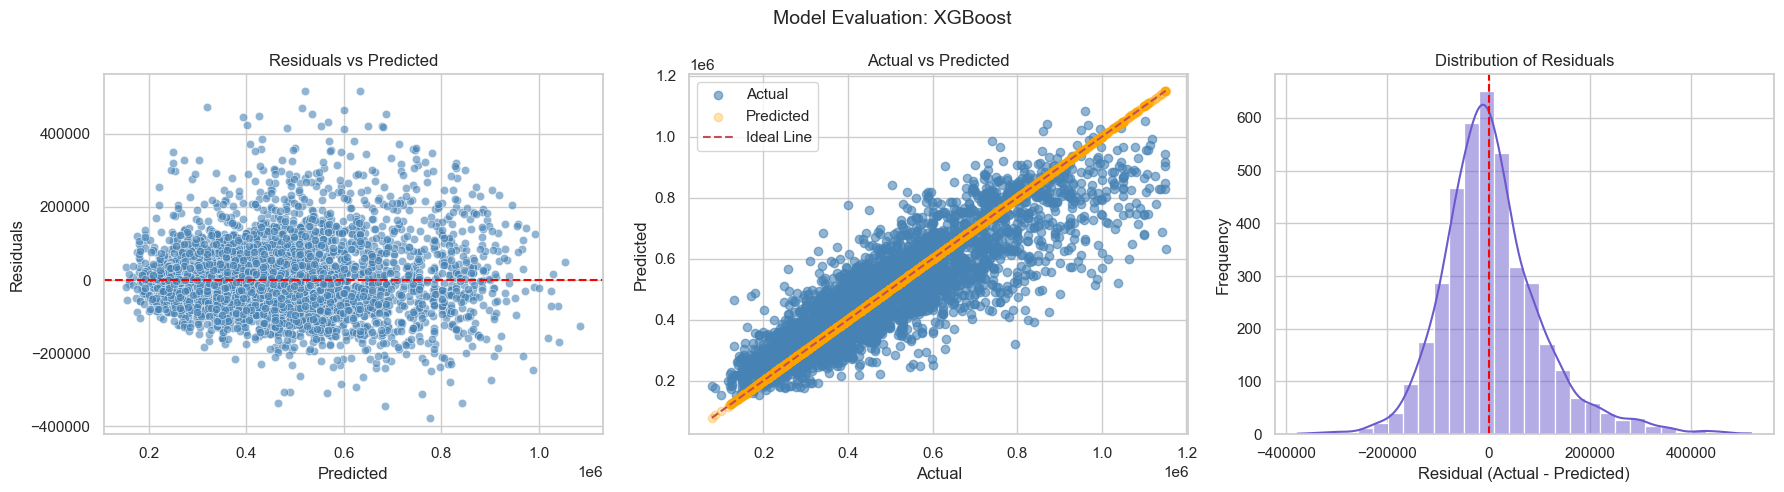

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 16242, number of used features: 11
[LightGBM] [Info] Start training from score 12.977462

----- LightGBM -----
R2 Score  : 0.77
MAE       : 71993.25
RMSE      : 99870.99


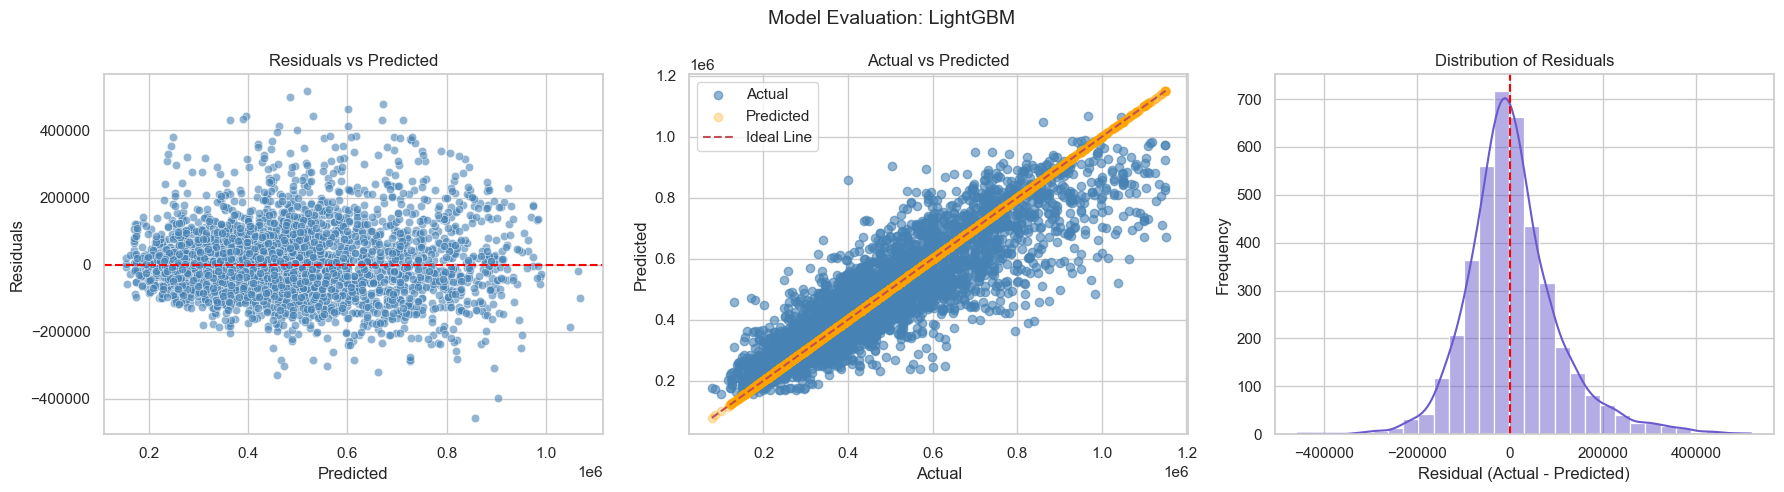

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2) 
y_train = np.log(y_train)

for name, model in models.items():
    evaluate_model(model, X_train, X_test, y_train, y_test, model_name=name)

In [47]:
# summary of all models

model_metrics_df = pd.DataFrame(model_metrics, index=["R2 score", "MAE", "RMSE"])
model_metrics_df

Linear Regression  Random Forest  Gradient Boosting    XGBoost  \
R2 score               0.72           0.72               0.76       0.76   
MAE                79267.75       79059.09           72878.15   73084.00   
RMSE              109174.68      109213.63          100646.11  100798.94   

          LightGBM  
R2 score      0.77  
MAE       71993.25  
RMSE      99870.99

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 16242, number of used features: 11
[LightGBM] [Info] Start training from score 12.977462


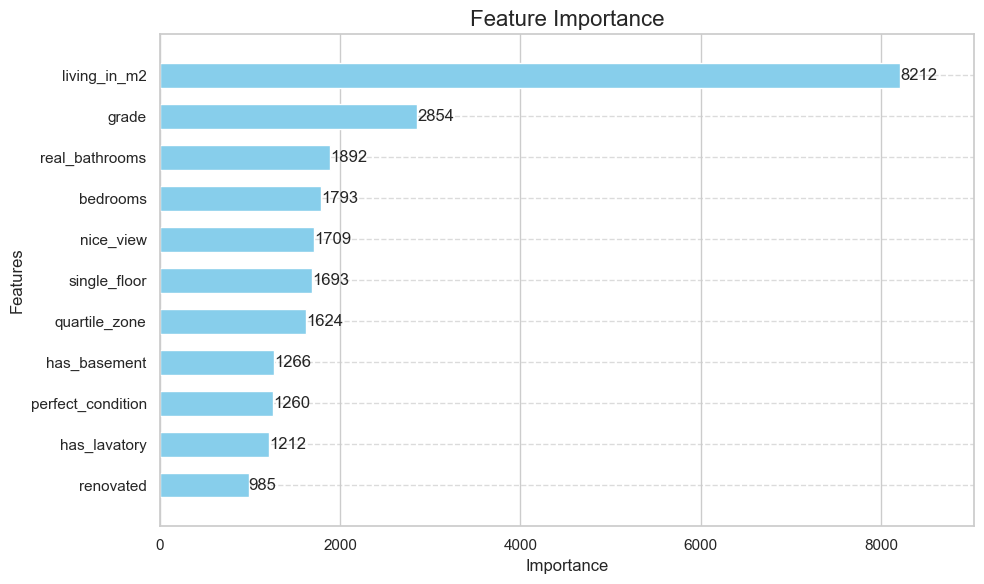

In [48]:
import lightgbm as lgb

# Best param from parameter tuning 

model = LGBMRegressor(colsample_bytree=0.7, learning_rate=0.01, max_depth=-1, min_child_samples=20, 
                      n_estimators=500, num_leaves=50, subsample=0.7,random_state=42).fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = np.exp(y_pred)
# Plot feature importance
lgb.plot_importance(model, max_num_features=20, importance_type='split', figsize=(10, 6), 
                    title="Feature Importance", color='skyblue', height=0.6)

# Customize the plot
plt.title("Feature Importance", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [49]:
y_pred[:4]

array([425057.07077498, 431404.63090634, 716896.94350779, 377228.21111303])

In [50]:
# Metrics
r2 = round(r2_score(y_test, y_pred), 2)
mae = round(mean_absolute_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

print(f"R2 Score  : {r2}")
print(f"MAE       : {mae}")
print(f"RMSE      : {rmse}")

R2 Score  : 0.77
MAE       : 71835.59
RMSE      : 99758.59


# Parameter Tuning

In [51]:
## Takes way too long(reduce the elements in list to reduce runtime)

# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'num_leaves': [31, 50, 100],
#     'max_depth': [-1, 5, 10],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [500, 1000],
#     'min_child_samples': [20, 40],
#     'subsample': [0.7, 0.9],
#     'colsample_bytree': [0.7, 0.9]
# }

# model = LGBMRegressor(random_state=42)

# grid = GridSearchCV(estimator=model, param_grid=param_grid,
#                     cv=3, scoring='neg_root_mean_squared_error',
#                     verbose=1, n_jobs=-1)

# grid.fit(X_train, y_train)

# print("Best parameters:", grid.best_params_)
# print("Best RMSE:", -grid.best_score_)